# Task 1.2 Data Analysis Project City Bike NYC

In [2]:
import pandas as pd
df = pd.read_excel('sample_data/ny_citibikes_raw.xlsx')
df.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday


## 1. Dataset Exploration

### - What information does each column contain?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20400 non-null  datetime64[ns]
 1   Stop Time             20400 non-null  datetime64[ns]
 2   Start Station ID      20400 non-null  int64         
 3   Start Station Name    20400 non-null  object        
 4   End Station ID        20400 non-null  int64         
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20400 non-null  int64         
 7   User Type             20400 non-null  object        
 8   Birth Year            20400 non-null  int64         
 9   Age                   20400 non-null  int64         
 10  Age Groups            20400 non-null  object        
 11  Trip Duration         20400 non-null  int64         
 12  Trip_Duration_in_min  20400 non-null  int64         
 13  Month           

### - Are there missing or duplicated values?

In [ ]:
# To see all the duplicated values i used:
df.duplicated().sum()


np.int64(3555)

In [ ]:
# Then i will delete them
df.drop_duplicates()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday
5,2017-01-01 02:22:00,2017-01-01 02:31:00,3212,Christ Hospital,3225,Baldwin at Montgomery,24520,Subscriber,1987,34,25-34,535,9,1,Winter,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20393,2017-03-31 21:03:00,2017-03-31 21:12:00,3278,Monmouth and 6th,3278,Monmouth and 6th,26221,Subscriber,1958,63,55-64,577,10,3,Spring,18,Friday
20394,2017-03-31 21:06:00,2017-03-31 21:10:00,3186,Grove St PATH,3203,Hamilton Park,24608,Subscriber,1968,53,45-54,244,4,3,Spring,18,Friday
20396,2017-03-31 21:13:00,2017-03-31 21:18:00,3195,Sip Ave,3194,McGinley Square,29219,Subscriber,1956,65,65-74,264,4,3,Spring,18,Friday
20398,2017-03-31 21:26:00,2017-03-31 21:30:00,3195,Sip Ave,3201,Dey St,29276,Subscriber,1970,51,45-54,239,4,3,Spring,18,Friday


### - What is the overall time span of the trips?

In [36]:
TotSec = df.groupby('Month')['Trip Duration'].sum()
TotMin = TotSec / 60
TotHour = TotSec / 3600
TotDay = TotSec / 86400
# Create a DataFrame with all the data
resultado = pd.DataFrame({
    'Seconds': TotSec,
    'Minutes': TotMin,
    'Hours': TotHour,
    'Days': TotDay
})
resultado.astype(int)

,Seconds,Minutes,Hours,Days
Month,,,,
1,2673662,44561,742,30
2,3337907,55631,927,38
3,5490823,91513,1525,63


## 2. Basic Statistics

### - What is the average trip duration (in minutes)?

In [ ]:
avg_duration_min = df['Trip_Duration_in_min'].mean()
print(f"Average trip duration: {avg_duration_min:.2f} minutes")

Average trip duration: 9.40 minutes


### - What is the minimum and maximum duration?

In [ ]:
min_duration_min = df['Trip_Duration_in_min'].min()
max_duration_min = df['Trip_Duration_in_min'].max()
print(f"Minimum trip duration: {min_duration_min:} minute")
print(f"Maximum trip duration: {max_duration_min:} minutes")

Minimum trip duration: 1 minute
Maximum trip duration: 6515 minutes


### - What are the most common start and end stations?

In [ ]:
most_common_start = df['Start Station Name'].mode().iloc[0]
most_common_end = df['End Station Name'].mode().iloc[0]
print("Most common start station:", most_common_start)
print("Most common end station:", most_common_end)

Most common start station: Grove St PATH
Most common end station: Grove St PATH


## 3. Users and Demographics

### - How many unique bikes were used?

In [ ]:
unique_bikes = df["Bike ID"].nunique()
unique_bikes

500

### - What are the proportions of user types (Subscriber vs Customer)?

In [ ]:
user_counts = df["User Type"].value_counts()
user_props = df["User Type"].value_counts(normalize=True)
print("\nUser type counts:\n", user_counts)
print("\nUser type proportions:\n", user_props)


User type counts:
 User Type
Subscriber       20020
One-time user      380
Name: count, dtype: int64

User type proportions:
 User Type
Subscriber       0.981373
One-time user    0.018627
Name: proportion, dtype: float64


### - What is the age distribution of the users? Which age group uses the service the most?

In [ ]:
TotAgeGroup = df.groupby('Age Groups')['Age'].count()
TotAgeGroup

,Age
Age Groups,
18-24,60
25-34,4936
35-44,9247
45-54,3581
55-64,1749
65-74,760
75+,67


In [ ]:
most_active_group = TotAgeGroup.idxmax()
max_trips = TotAgeGroup.max()
print(f"The age group that uses the service the most is: {most_active_group} with {max_trips} trips")

The age group that uses the service the most is: 35-44 with 9247 trips


## 4. Temporal Analysis

### - How does the number of trips vary by weekday?

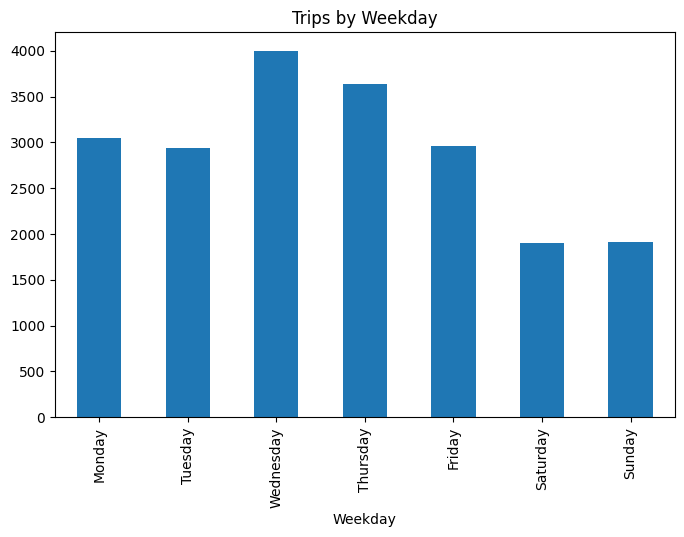

In [9]:
import matplotlib.pyplot as plt
# To order weekdays
weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

df["Weekday"].value_counts().reindex(weekdays).plot(
    kind="bar", figsize=(8,5), title="Trips by Weekday"
)
plt.show()

### - Which month or season has the most rides?

In [33]:
month = df["Month"].value_counts().sort_index()
season = df["Season"].value_counts()
print(month, "\n")
print(season)

Month
1    5138
2    5604
3    9658
Name: count, dtype: int64 

Season
Winter    10742
Spring     9658
Name: count, dtype: int64


### - What time of day do most trips start?

In [45]:
hour_counts = df["Start_Hour"].value_counts().sort_index()
peak_hour = hour_counts.idxmax()
print(f"Most trips start at {peak_hour}:00")

Most trips start at 8:00


## 5. Geographic Analysis

### - Which station pairs (start → end) appear most often?

In [54]:
pair_stations = df["Start Station Name"] + " → " + df["End Station Name"]
top_pairs = pair_stations.value_counts().head()
top_pairs

,count
Hamilton Park → Grove St PATH,500
Morris Canal → Exchange Place,445
Exchange Place → Morris Canal,367
Dixon Mills → Grove St PATH,349
Grove St PATH → Hamilton Park,340


### - Are there any stations that appear only as start or only as end stations?

In [62]:
start_stations = set(df["Start Station Name"])
end_stations = set(df["End Station Name"])

only_start = start_stations - end_stations
only_end = end_stations - start_stations

print(f"Stations only as start: {only_start}")
print(f"Stations only as end: {only_end}")

Stations only as start: set()
Stations only as end: {nan, 'Broadway & W 36 St', 'Indiana', 'JCBS Depot', 'E 15 St & 3 Ave', 'Warren St & Church St', 'W 45 St & 8 Ave'}


## 6. Temperature and Duration

### - Is there any visible relationship between temperature and trip duration?

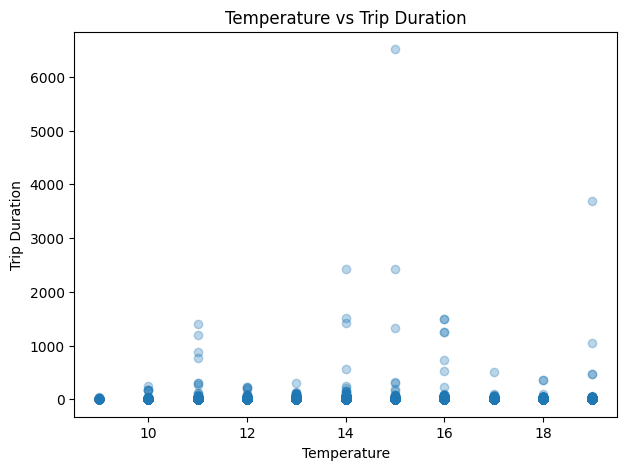

In [69]:
df["Temperature"] = pd.to_numeric(df["Temperature"])

plt.figure(figsize=(7,5))
plt.scatter(df["Temperature"], df["Trip_Duration_in_min"], alpha=0.3)
plt.xlabel("Temperature")
plt.ylabel("Trip Duration")
plt.title("Temperature vs Trip Duration")
plt.show()



### - How does average trip duration vary by season?

In [74]:
avg_duration_by_season = (df.groupby("Season")["Trip_Duration_in_min"].mean().round(2))
print(f"Average Trip Duration by Season: {avg_duration_by_season}")

Average Trip Duration by Season: Season
Spring    9.48
Winter    9.33
Name: Trip_Duration_in_min, dtype: float64


### 7. Summary and Interpretation

- Write a short summary (5–10 lines) of your findings.

Most trips start in the morning, showing a clear peak during typical commute hours. Certain station pairs are used much more frequently than others, indicating common travel routes. Some stations appear only as starting points or only as ending points. Trip duration also varies by season, with noticeable differences between warmer and colder months. Overall, the data shows clear usage patterns influenced by time, location, and seasonal changes.

- Mention patterns, anomalies, or interesting trends you observed.

Some interesting trends show that usage can vary a lot between weekdays and weekends. There are occasional spikes in trips that don't follow the usual patterns. Weather and temperature might also affect how many people take trips. Overall, the data has some unexpected variations that suggest people's biking habits change depending on external factors.